In [2]:
import geopandas as gpd
import geoplot
from shapely.ops import unary_union
import shapely
import pypsa

In [2]:
countries = gpd.read_file("resources/country_shapes.geojson")
europe = gpd.read_file("resources/europe_shape.geojson")
ren_zones = gpd.read_file("resources/renewable_shapes.geojson")

In [7]:
#n = pypsa.Network("networks/base_s-5.nc")
#n= pypsa.Network("networks/elec_s-5.nc")
n = pypsa.Network("networks/elec_s_64_s-5.nc")

INFO:pypsa.io:Imported network elec_s-5.nc has buses, carriers, generators, lines, links, loads, storage_units, transformers
INFO:pypsa.io:Imported network elec_s_64_s-5.nc has buses, carriers, generators, lines, links, loads, storage_units


In [8]:
n.buses

,v_nom,x,y,country,control,generator,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
name,,,,,,,,,,,,,
AL1 0,380.0,19.897914,41.587568,AL,Slack,AL1 0 offwind-ac,,AC,None,1.0,0.0,inf,
AT1 0,380.0,13.604274,47.549498,AT,PQ,,,AC,None,1.0,0.0,inf,
BA1 0,380.0,18.122704,43.811367,BA,PQ,,,AC,None,1.0,0.0,inf,
BE1 0,380.0,4.617461,50.818887,BE,PQ,,,AC,None,1.0,0.0,inf,
BG1 0,380.0,24.673671,42.765271,BG,PQ,,,AC,None,1.0,0.0,inf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RO1 0,380.0,25.091770,45.551309,RO,PQ,,,AC,None,1.0,0.0,inf,
RS1 0,380.0,20.662692,44.113710,RS,PQ,,,AC,None,1.0,0.0,inf,
SE2 0,380.0,16.277634,61.357761,SE,PQ,,,AC,None,1.0,0.0,inf,


<AxesSubplot:>

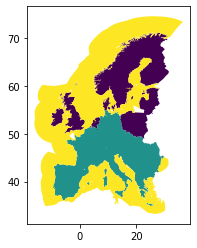

In [12]:
ren_zones.plot(column = "index")

In [3]:
latitudes = []
for country in countries.geometry:
    latitudes.append(country.centroid.y)

In [144]:
north_list = []
south_list = []
for ind in countries.index:
    print(countries.name[ind],countries.geometry[ind].centroid.y)
    if countries.geometry[ind].centroid.y >= center:
        print("north")
        north_list.append(countries.geometry[ind])
    elif countries.geometry[ind].centroid.y <= center:
        print("south")
        south_list.append(countries.geometry[ind])
        
south_list = []
for ind in countries.index:
    print(countries.name[ind],countries.geometry[ind].centroid.y)
    if countries.geometry[ind].centroid.y <= center:
        print("north")
        south_list.append(countries.geometry[ind])

AL 41.14345820922522
south
AT 47.58530691531186
south
BE 50.638031214358264
south
BG 42.76890485982856
south
BA 44.17091811250334
south
CH 46.7987397997386
south
CZ 49.732061633158196
south
DE 51.09654507296024
south
DK 56.02516783605677
north
ES 40.38354988700026
south
EE 58.671131689274596
north
FI 64.51024812853493
north
FR 46.55461618926471
south
GB 54.092712392939724
north
GR 39.16496258767048
south
HR 45.156113390260366
south
HU 47.16263315982436
south
IE 53.17634024145087
north
IT 42.78935990299607
south
LT 55.32707111487726
north
LU 49.766376449954215
south
LV 56.85180435405814
north
MK 41.59612381302712
south
ME 42.7852657464697
south
NL 52.260806685683704
north
NO 64.39703144961807
north
PL 52.12506255159926
north
PT 39.679752270400726
south
RO 45.8537417778426
south
RS 44.02245090890639
south
SK 48.704622025709945
south
SI 46.117270182640546
south
SE 62.78660263233857
north
AL 41.14345820922522
north
AT 47.58530691531186
north
BE 50.638031214358264
north
BG 42.76890485982856

In [167]:
un = unary_union(north_list)
us = unary_union(south_list)

In [187]:
d = {"name" : ["North","South"],"geometry" : [un,us]  }
gpd.GeoDataFrame(d)

,name,geometry
0,North,"MULTIPOLYGON (((4.15650 51.35757, 4.18002 51.3..."
1,South,"MULTIPOLYGON (((24.16041 35.59707, 24.18295 35..."


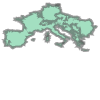

In [183]:
unary_union(south_list)

In [180]:
gpd.GeoDataFrame(geometry=north_list)

,geometry
0,"MULTIPOLYGON (((10.46046 57.63056, 10.43043 57..."
1,"MULTIPOLYGON (((25.80738 59.58047, 25.86134 59..."
2,"POLYGON ((27.89729 70.07069, 28.16736 69.89434..."
3,"MULTIPOLYGON (((-3.34789 58.65204, -3.20409 58..."
4,"POLYGON ((-7.12906 55.28583, -6.95352 55.25434..."
5,"POLYGON ((24.91014 56.42196, 24.97318 56.30075..."
6,"POLYGON ((25.33368 58.03181, 25.39662 58.02318..."
7,"MULTIPOLYGON (((6.86687 53.43427, 6.90056 53.3..."
8,"MULTIPOLYGON (((27.71551 71.10423, 27.72462 71..."
9,"POLYGON ((19.00213 54.34492, 19.37721 54.37763..."


In [4]:
gpd.GeoDataFrame(geometry=south_list).plot()

NameError: name 'south_list' is not defined

In [111]:
max_lat = max(latitudes)
print(max_lat)
min_lat = min(latitudes)
print(min_lat)

64.51024812853493
39.16496258767048


In [114]:
center = (max_lat + min_lat)/2

In [62]:
north = gpd.GeoSeries
for country in countries.rows:
    print(country)
    if country.geometry.centroid.x >= center:
        print(country)
        north = north.append(country)
        

AttributeError: 'GeoDataFrame' object has no attribute 'rows'

In [55]:
north.append(countries.geometry[1])

AttributeError: 'Polygon' object has no attribute '_wrapped_pandas_method'

In [57]:
countries[1]

KeyError: 1

In [48]:
n = py